In [31]:
import matplotlib
# matplotlib.use("Agg")

# import the necessary packages
from model.convautoencoder import ConvAutoencoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2


In [32]:
input = cv2.imread('60200-105799-18_sat.png')
mask = cv2.imread('60200-105799-18_aerial.png')
scale_factor = 1./255
input = input*scale_factor
mask = mask*scale_factor
x = np.expand_dims(input, axis=0)
y = np.expand_dims(mask, axis=0)

In [33]:
# initialize the number of epochs to train for and batch size
EPOCHS = 700
BS = 1

# load the MNIST dataset
print("[INFO] loading MNIST dataset...")
((trainX, _), (testX, _)) = mnist.load_data()

# add a channel dimension to every image in the dataset, then scale
# the pixel intensities to the range [0, 1]
trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

# construct our convolutional autoencoder
print("[INFO] building autoencoder...")
(encoder, decoder, autoencoder) = ConvAutoencoder.build(512, 512, 3)
opt = Adam(lr=1e-3)
autoencoder.compile(loss="mse", optimizer=opt)

[INFO] loading MNIST dataset...
[INFO] building autoencoder...


In [34]:
# train the convolutional autoencoder
H = autoencoder.fit(
	x, y,
	validation_data=(x, y),
	epochs=EPOCHS,
	batch_size=BS)

Epoch 1/700
1/1 [==============================] - 1s 514ms/step - loss: 0.0781 - val_loss: 0.0568
Epoch 2/700
1/1 [==============================] - 0s 288ms/step - loss: 0.0759 - val_loss: 0.0567
Epoch 3/700
1/1 [==============================] - 0s 285ms/step - loss: 0.0683 - val_loss: 0.0567
Epoch 4/700
1/1 [==============================] - 0s 308ms/step - loss: 0.0606 - val_loss: 0.0566
Epoch 5/700
1/1 [==============================] - 0s 295ms/step - loss: 0.0533 - val_loss: 0.0565
Epoch 6/700
1/1 [==============================] - 0s 325ms/step - loss: 0.0471 - val_loss: 0.0564
Epoch 7/700
1/1 [==============================] - 0s 286ms/step - loss: 0.0415 - val_loss: 0.0562
Epoch 8/700
1/1 [==============================] - 0s 293ms/step - loss: 0.0365 - val_loss: 0.0559
Epoch 9/700
1/1 [==============================] - 0s 291ms/step - loss: 0.0325 - val_loss: 0.0555
Epoch 10/700
1/1 [==============================] - 0s 288ms/step - loss: 0.0293 - val_loss: 0.0550
Epoch 11/

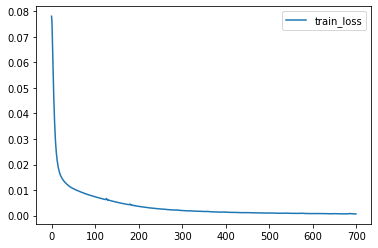

In [39]:
plt.plot(H.history['loss'], label = 'train_loss')
plt.legend()
plt.show()

In [41]:
prediction = autoencoder.predict(x)

In [42]:
recon = (prediction[0] * 255).astype("uint8")

In [43]:
cv2.imwrite('decoded.png', recon)

True

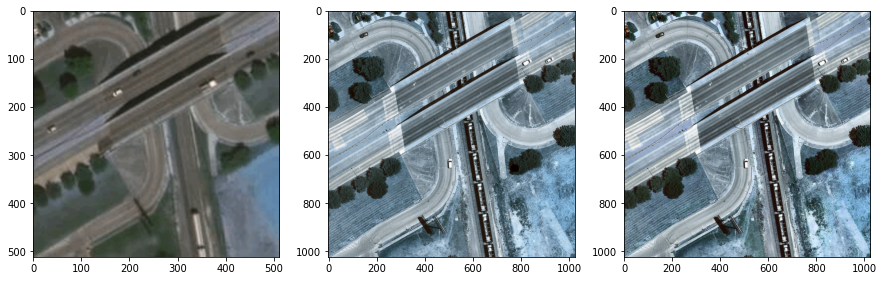

In [50]:
from matplotlib import pyplot
pyplot.figure(figsize = (15, 45))
imgs = [x[0]*255, recon, y[0]*255]
for i in range(3):
	# define subplot
	pyplot.subplot(131 + 0 + i)

	image = imgs[i].astype("uint8")
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()